In [1]:
import os
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
alf_name = "ALFWorld"
cc_name = "Coin Collector"

# Figure 5 & 7 (Success Rate on Both datasets)

/var/folders/1l/8tgmgvn13gn284m3vdfgrh240000gn/T/ipykernel_90417/1083050478.py:39: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=plot_df[plot_df["Task"] == "coincollector"],
/var/folders/1l/8tgmgvn13gn284m3vdfgrh240000gn/T/ipykernel_90417/1083050478.py:47: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=plot_df[plot_df["Task"] == "alfworld"],


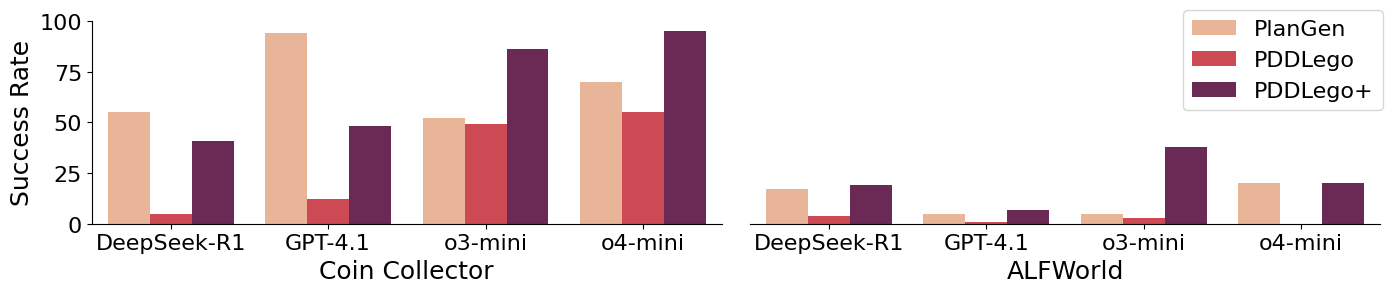

In [3]:
# edit color
colors = plt.get_cmap("rocket_r")(np.linspace(0.15, 0.7, 3))

import pandas as pd
import numpy as np

# Data for both tasks
data = {
    "Model": ["DeepSeek-R1", "GPT-4.1", "o3-mini", "o4-mini"],
    "coincollector_PlanGen": [55, 94, 52, 70],
    "coincollector_PDDLego": [5, 12, 49, 55],
    "coincollector_PDDLego+": [41, 48, 86, 95],
    "alfworld_PlanGen": [17, 5, 5, 20],
    "alfworld_PDDLego": [4, 1, 3, 0],
    "alfworld_PDDLego+": [19, 7, 38, 20],
}

# Create the DataFrame
df = pd.DataFrame(data)

# Reshape for plotting
coincollector_df = df[["Model", "coincollector_PlanGen", "coincollector_PDDLego", "coincollector_PDDLego+"]].melt(
    id_vars="Model", var_name="Method", value_name="Success Rate")
coincollector_df["Task"] = "coincollector"
coincollector_df["Method"] = coincollector_df["Method"].str.replace("coincollector_", "")

alfworld_df = df[["Model", "alfworld_PlanGen", "alfworld_PDDLego", "alfworld_PDDLego+"]].melt(
    id_vars="Model", var_name="Method", value_name="Success Rate")
alfworld_df["Task"] = "alfworld"
alfworld_df["Method"] = alfworld_df["Method"].str.replace("alfworld_", "")

# Combine data
plot_df = pd.concat([coincollector_df, alfworld_df])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 3), sharey=True)

# Plot for coincollector
sns.barplot(data=plot_df[plot_df["Task"] == "coincollector"],
            x="Model", y="Success Rate", hue="Method", ax=axes[0], palette=colors)
axes[0].set_xlabel(cc_name, fontsize=18)
axes[0].set_ylabel("Success Rate", fontsize=18)
axes[0].set_ylim([0, 100])
axes[0].tick_params(axis='both', labelsize=16)

# Plot for alfworld
sns.barplot(data=plot_df[plot_df["Task"] == "alfworld"],
            x="Model", y="Success Rate", hue="Method", ax=axes[1], palette=colors)
axes[1].set_xlabel(alf_name, fontsize=18)
axes[1].tick_params(axis='both', labelsize=16)
axes[1].set_ylabel("")
axes[1].tick_params(axis='y', left=False, labelleft=False)  # Hide y-axis

axes[0].legend_.remove()
axes[1].legend_.remove()
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

# Place a single legend at the center bottom
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, fontsize=16, title_fontsize=16)

# Adjust layout and legend
plt.tight_layout()
plt.savefig("Figures/success_rate_all.pdf", bbox_inches='tight')
plt.show()


# Figure 6 & 8 (Average Execution Steps on Both datasets) 

/var/folders/1l/8tgmgvn13gn284m3vdfgrh240000gn/T/ipykernel_90417/2840784034.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=60, fontsize=14)
/var/folders/1l/8tgmgvn13gn284m3vdfgrh240000gn/T/ipykernel_90417/2840784034.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=60, fontsize=14)


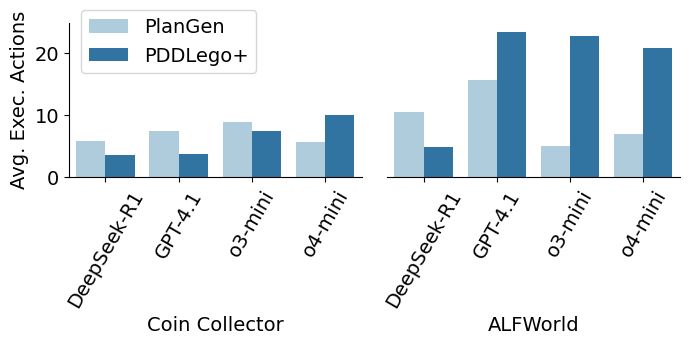

In [4]:
colors = "Paired"
# plt.get_cmap("rocket_r")(np.linspace(0.15, 0.7, 2))

import pandas as pd

# Data for both tasks
data = {
    "Model": ["DeepSeek-R1", "GPT-4.1", "o3-mini", "o4-mini"],
    "coincollector_PlanGen": [5.9, 7.4, 8.9, 5.6],
    # "coincollector_PDDLego": [5, 12, 49, 55],
    "coincollector_PDDLego+": [3.63, 3.77, 7.48, 10],
    "alfworld_PlanGen": [10.6, 15.7, 5, 7],
    # "alfworld_PDDLego": [4, 1, 3, 0],
    "alfworld_PDDLego+": [4.92, 23.5, 22.75, 20.95],
}

# Create the DataFrame
df = pd.DataFrame(data)

# Reshape for plotting
coincollector_df = df[["Model", "coincollector_PlanGen", "coincollector_PDDLego+"]].melt(
    id_vars="Model", var_name="Method", value_name="Avg. Execution Actions")
coincollector_df["Task"] = "coincollector"
coincollector_df["Method"] = coincollector_df["Method"].str.replace("coincollector_", "")

alfworld_df = df[["Model", "alfworld_PlanGen", "alfworld_PDDLego+"]].melt(
    id_vars="Model", var_name="Method", value_name="Avg. Execution Actions")
alfworld_df["Task"] = "alfworld"
alfworld_df["Method"] = alfworld_df["Method"].str.replace("alfworld_", "")

# Combine data
plot_df = pd.concat([coincollector_df, alfworld_df])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 3.5), sharey=True)

# Plot for coincollector
sns.barplot(data=plot_df[plot_df["Task"] == "coincollector"],
            x="Model", y="Avg. Execution Actions", hue="Method", ax=axes[0], palette=colors)
axes[0].set_xlabel(cc_name, fontsize=14)
axes[0].set_ylabel("Avg. Exec. Actions", fontsize=14)
axes[0].set_ylim([0, 25])
axes[0].tick_params(axis='both', labelsize=14)

# Plot for alfworld
sns.barplot(data=plot_df[plot_df["Task"] == "alfworld"],
            x="Model", y="Avg. Execution Actions", hue="Method", ax=axes[1], palette=colors)
axes[1].set_xlabel(alf_name, fontsize=14)
axes[1].tick_params(axis='both', labelsize=14)
axes[1].set_ylabel("")
axes[1].tick_params(axis='y', left=False, labelleft=False)  # Hide y-axis

axes[0].legend_.remove()
axes[1].legend_.remove()
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=60, fontsize=14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=60, fontsize=14)

# Place a single legend at the center bottom
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', ncol=1, fontsize=14, bbox_to_anchor=(0.11, 1))

# Adjust layout and legend
plt.tight_layout()
plt.savefig("Figures/avg_step_all.pdf", bbox_inches='tight')
plt.show()


# Figure 9 (Breakdown analysis) 

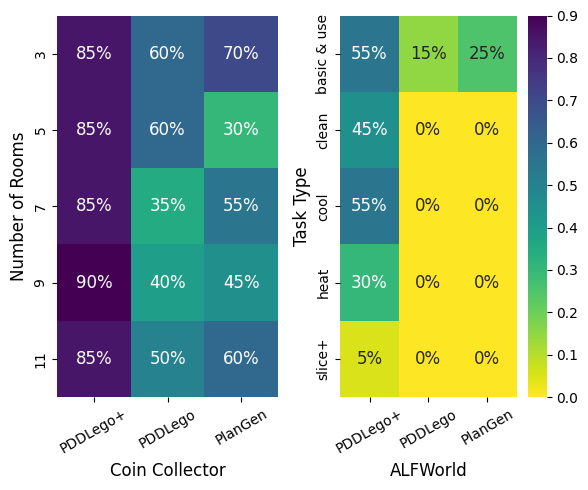

In [5]:
colors = "viridis_r"

# Create the two heatmap DataFrames
df1 = pd.DataFrame({
    "3": [0.85, 0.6, 0.7],
    "5": [0.85, 0.6, 0.3],
    "7": [0.85, 0.35, 0.55],
    "9": [0.9, 0.4, 0.45],
    "11": [0.85, 0.5, 0.6]
}, index=["PDDLego+", "PDDLego", "PlanGen"])

df2 = pd.DataFrame({
    "basic & use": [0.55, 0.15, 0.25],
    "clean": [0.45, 0.0, 0.0],
    "cool": [0.55, 0.0, 0.0],
    "heat": [0.3, 0.0, 0.0],
    "slice+": [0.05, 0.0, 0.0]
}, index=["PDDLego+", "PDDLego", "PlanGen"])

# Transpose the data to swap x and y axes
df1_t = df1.T
df2_t = df2.T

# Set up figure and axes
fig, axes = plt.subplots(1, 2, figsize=(6, 5), gridspec_kw={'width_ratios': [1, 1]})

# Shared color scale
vmin = min(df1_t.min().min(), df2_t.min().min())
vmax = max(df1_t.max().max(), df2_t.max().max())

# First heatmap (step count)
sns.heatmap(df1_t, ax=axes[0], annot=True, fmt=".0%", annot_kws={"size": 12}, vmin=vmin, vmax=vmax, cmap=colors, cbar=False)
# axes[0].set_title("Success Rate by Step Count")
axes[0].set_xlabel(cc_name, fontsize=12)
axes[0].set_ylabel("Number of Rooms", fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, fontsize=10)

# Second heatmap (task type) with shared colorbar
sns.heatmap(df2_t, ax=axes[1], annot=True, fmt=".0%", annot_kws={"size": 12}, vmin=vmin, vmax=vmax, cmap=colors, cbar=True)
# axes[1].set_title("Success Rate by Task Type")
axes[1].set_xlabel(alf_name, fontsize=12)
axes[1].set_ylabel("Task Type", fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, fontsize=10)
cbar = axes[1].collections[0].colorbar
# cbar_ax.tick_params(labelsize=12)

# Adjust layout
plt.tight_layout()
plt.savefig("Figures/breakdown.pdf", bbox_inches='tight')
plt.show()


# Figure 10 & 11 (Sol. and Sim. Errors) 


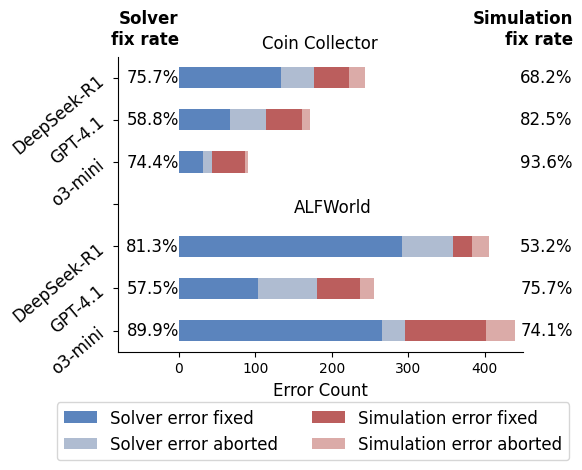

In [6]:
# edit color
colors = plt.get_cmap("vlag")([0.1, 0.3, 0.9, 0.7])

# Create a DataFrame with the new error data
error_data = {
    "Model": ["DeepSeek-R1", "GPT-4.1", "o3-mini", "", "DeepSeek-R1", "GPT-4.1", "o3-mini"],
    "Solver error fixed": [134, 67, 32, np.nan, 292, 104, 266],
    "Solver error aborted": [43, 47, 11, np.nan, 67, 77, 30],
    "Simulation error fixed": [45, 47, 44, np.nan, 25, 56, 106],
    "Simulation error aborted": [21, 10, 3, np.nan, 22, 18, 37],
    "Solver fix rate": [75.71, 58.77, 74.42, np.nan, 81.34, 57.46, 89.86],
    "Simulation fix rate": [68.18, 82.46, 93.62, np.nan, 53.19, 75.68, 74.13],
}

# Calculate base error count and derive residual to match total
df_error = pd.DataFrame(error_data)

# Reorder columns for plotting
plot_df = df_error[["Model", "Solver error fixed", "Solver error aborted", "Simulation error fixed", "Simulation error aborted"]].set_index("Model")

# Rename columns to match legend
plot_df.columns = ["Solver error fixed", "Solver error aborted", "Simulation error fixed", "Simulation error aborted"]

# Plot with legend above the title (center top)
fig, ax = plt.subplots(figsize=(6, 4))

ytick_positions = np.linspace(0, 1, 3)  # Custom vertical positions

plot_df = plot_df.iloc[::-1]
plot_df.plot(kind="barh", stacked=True, ax=ax, color=colors)

# Axis labels and ticks
ax.set_xlabel("Error Count", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.set_title(cc_name)
ax.tick_params(labelsize=10)
ax.set_yticks(range(len(plot_df.index)))
ax.set_yticklabels(plot_df.index, fontsize=12, rotation=40)
ax.legend_.remove()

# Move legend to center top above the plot
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=12, title_fontsize=14,
           loc='upper center', bbox_to_anchor=(0.53, 0.05), ncol=2)

# Set x-axis limits to make space for PCR and model names on the left
ax.set_xlim(-80, 450)
ax.text(150, 2.7, alf_name, ha='left', va='bottom', fontsize=12)

# solver rate
ax.text(0, 6.7, "Solver\nfix rate", ha='right', va='bottom', fontsize=12, fontweight='bold')
for i, rate in enumerate(error_data["Solver fix rate"][::-1]):
    if rate is not np.nan:
        ax.text(0, i, f'{rate:.1f}%', ha='right', va='center', fontsize=12, color='black')

# simulation rate
ax.text(515, 6.7, "Simulation\nfix rate", ha='right', va='bottom', fontsize=12, fontweight='bold')
for i, rate in enumerate(error_data["Simulation fix rate"][::-1]):
    if rate is not np.nan:
        ax.text(515, i, f'{rate:.1f}%', ha='right', va='center', fontsize=12, color='black')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 1, 1.05])
plt.savefig("Figures/sim_sol_error.pdf", bbox_inches='tight')
plt.show()


# Figure 12 (Prompt sensitivity)
## How it has to be a figure? Just four numbers on ALFWorld.

/var/folders/1l/8tgmgvn13gn284m3vdfgrh240000gn/T/ipykernel_90417/887945641.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Setting", y="Percentage", palette=colors)
/var/folders/1l/8tgmgvn13gn284m3vdfgrh240000gn/T/ipykernel_90417/887945641.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)


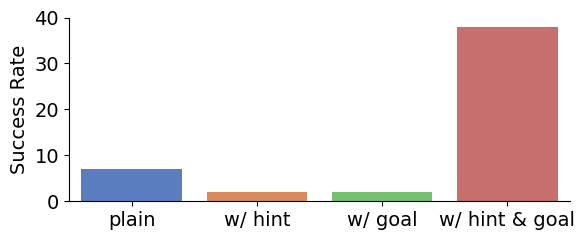

In [7]:
colors = "muted"

# Data
data = {
    "Setting": [
        "plain",
        "w/ hint",
        "w/ goal",
        "w/ hint & goal"
    ],
    "Percentage": [7, 2, 2, 38]
}

df = pd.DataFrame(data)

# Plot
fig, ax = plt.subplots(figsize=(6, 2.5))
sns.barplot(data=df, x="Setting", y="Percentage", palette=colors)

# Aesthetics
plt.ylabel("Success Rate", fontsize=14)
plt.xlabel("", fontsize=14)
ax.tick_params(labelsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_ylim(0, 40)
plt.tight_layout()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig("Figures/prompt_sensitivity.pdf", bbox_inches='tight')
plt.show()

# Figure 13 & 14 (Reuse domain file)

## Actually while plotting this, I think it is a kind of RAG, i.e., retrieving DF with success trajectories before. An argument could be RAG can negatively impact o3-mini internal thinking if the knowledge base is not "clean" enough. Open to disagreement tho.


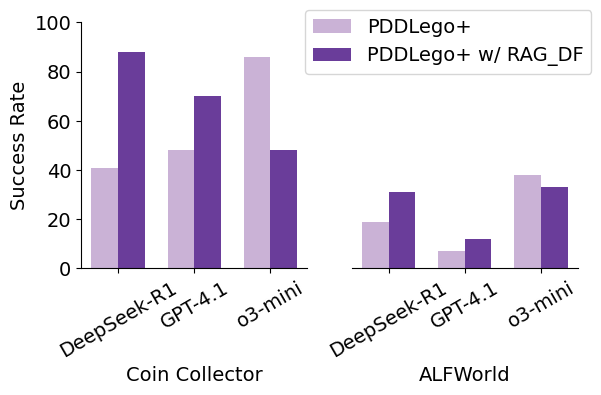

In [8]:
colors = [sns.color_palette("Paired")[8], sns.color_palette("Paired")[9]]

models = ["DeepSeek-R1", "GPT-4.1", "o3-mini"]
datasets = ["Alfworld", "CC"]
methods = ["PDDLego+", "PDDLego+ w/ RAG_DF"]

# Get values for each combination
values = {
    ("DeepSeek-R1", "Alfworld", "PDDLego+"): 0.19,
    ("DeepSeek-R1", "Alfworld", "PDDLego+ w/ RAG_DF"): 0.31,
    ("DeepSeek-R1", "CC", "PDDLego+"): 0.41,
    ("DeepSeek-R1", "CC", "PDDLego+ w/ RAG_DF"): 0.88,
    
    ("GPT-4.1", "Alfworld", "PDDLego+"): 0.07,
    ("GPT-4.1", "Alfworld", "PDDLego+ w/ RAG_DF"): 0.12,
    ("GPT-4.1", "CC", "PDDLego+"): 0.48,
    ("GPT-4.1", "CC", "PDDLego+ w/ RAG_DF"): 0.70,
    
    ("o3-mini", "Alfworld", "PDDLego+"): 0.38,
    ("o3-mini", "Alfworld", "PDDLego+ w/ RAG_DF"): 0.33,
    ("o3-mini", "CC", "PDDLego+"): 0.86,
    ("o3-mini", "CC", "PDDLego+ w/ RAG_DF"): 0.48,
}

values = {k: v*100 for k, v in values.items()}

# Prepare per-dataset data
x_labels = ["DeepSeek-R1", "GPT-4.1", "o3-mini"]
x = np.arange(len(x_labels))
bar_width = 0.35

# Alfworld values
alfworld_pddl = [values[(model, "Alfworld", "PDDLego+")] for model in x_labels]
alfworld_rag = [values[(model, "Alfworld", "PDDLego+ w/ RAG_DF")] for model in x_labels]

# CC values
cc_pddl = [values[(model, "CC", "PDDLego+")] for model in x_labels]
cc_rag = [values[(model, "CC", "PDDLego+ w/ RAG_DF")] for model in x_labels]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(6, 4), sharey=True)

# Alfworld subplot
axes[0].bar(x - bar_width/2, cc_pddl, bar_width, label="PDDLego+", color=colors[0])
axes[0].bar(x + bar_width/2, cc_rag, bar_width, label="PDDLego+ w/ RAG_DF", color=colors[1])
axes[0].set_xticks(x)
axes[0].set_xticklabels(x_labels, rotation=30, fontsize=14)
axes[0].set_xlabel(cc_name, fontsize=14)
axes[0].set_ylabel("Success Rate", fontsize=14)
axes[0].set_ylim(0, 100)
axes[0].tick_params(axis='both', labelsize=14)

# CC subplot
axes[1].bar(x - bar_width/2, alfworld_pddl, bar_width, label="PDDLego+", color=colors[0])
axes[1].bar(x + bar_width/2, alfworld_rag, bar_width, label="PDDLego+ w/ RAG_DF", color=colors[1])
axes[1].set_xticks(x)
axes[1].set_xticklabels(x_labels, rotation=30, fontsize=14)
axes[1].set_xlabel(alf_name, fontsize=14)

# axes[0].legend_.remove()
# axes[1].legend_.remove()
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].set_ylabel("")
axes[1].tick_params(axis='y', left=False, labelleft=False)  # Hide y-axis

# Shared legend
fig.legend(["PDDLego+", "PDDLego+ w/ RAG_DF"], loc="upper left", ncol=1, fontsize=14, bbox_to_anchor=(0.5, 1))
plt.tight_layout()
plt.savefig("Figures/df_rag.pdf", bbox_inches='tight')
plt.show()
